In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import os

from actsnclass.plot_results import Canvas

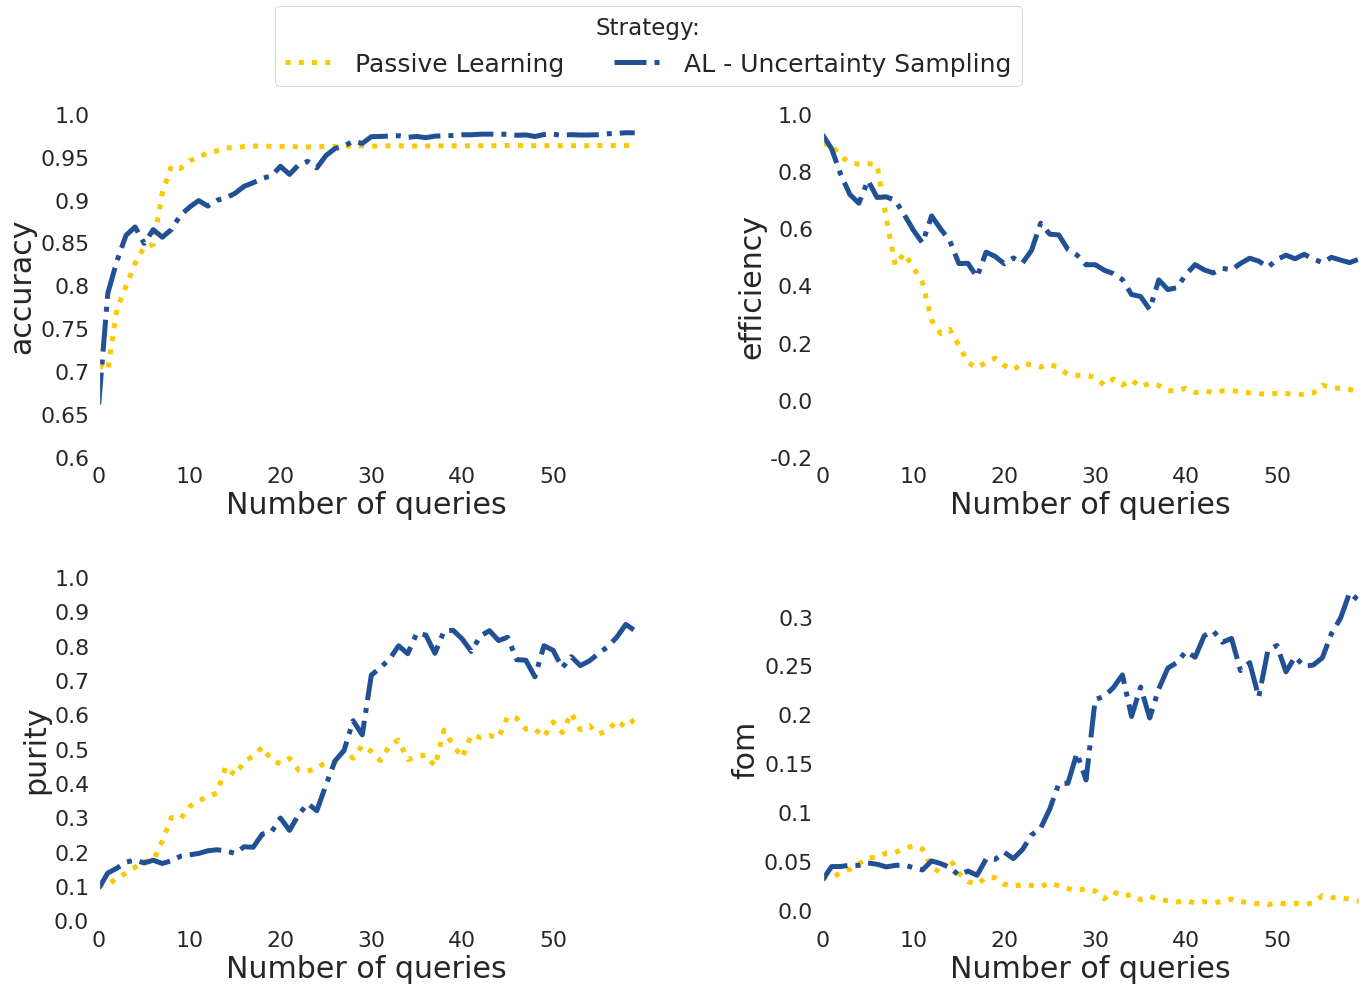

In [2]:
v = 1

strategies_list = ['RandomSampling', 'UncSampling']

dirname = 'results_42876'

path_to_files = [dirname + '/RandomSampling/metrics/metrics_RandomSampling_v' + str(v) + '.dat',
                 dirname + '/UncSampling/metrics/metrics_UncSampling_v' + str(v) + '.dat']

output_fname = 'plots/metrics_42876_' + str(v) + '.png'

# create Canvas object
cv = Canvas()

# load data
cv.load_metrics(path_to_files=path_to_files,
                strategies_list=strategies_list)

# set plot dimensions
cv.set_plot_dimensions()

# save plot to file
cv.plot_metrics(output_plot_file=output_fname,
                strategies_list=strategies_list)

# build population plots

In [4]:
flist = {}

for name in strategies_list:
    flist[name] = os.listdir(dirname + '/' + name + '/metrics/')

In [3]:
n_versions = 100

metrics = {}

for name in strategies_list:
    
    metrics[name] = {}
    
    for i in range(n_versions):
        metrics[name][i] = pd.read_csv(dirname + '/' + name + '/metrics/metrics_' + name + '_v' + str(i) + '.dat', index_col=False,
                                      sep=' ')


In [4]:
acc = {}
eff = {}
pur = {}
fom = {}

acc_mean = {}
eff_mean = {}
pur_mean = {}
fom_mean = {}

acc_std = {}
eff_std = {}
pur_std = {}
fom_std = {}

n_loops = 60

for name in strategies_list:
    acc[name] = np.array([metrics[name][i]['accuracy'].values for i in range(n_versions)])
    pur[name] = np.array([metrics[name][i]['purity'].values for i in range(n_versions)])
    eff[name] = np.array([metrics[name][i]['efficiency'].values for i in range(n_versions)])
    fom[name] = np.array([metrics[name][i]['fom'].values for i in range(n_versions)])

    acc_mean[name] = np.array([np.mean(acc[name][:,i]) for i in range(n_loops)])
    acc_std[name] = np.array([np.std(acc[name][:,i]) for i in range(n_loops)])

    pur_mean[name] = np.array([np.mean(pur[name][:,i]) for i in range(n_loops)])
    pur_std[name] = np.array([np.std(pur[name][:,i]) for i in range(n_loops)])

    eff_mean[name] = np.array([np.mean(eff[name][:,i]) for i in range(n_loops)])
    eff_std[name] = np.array([np.std(eff[name][:,i]) for i in range(n_loops)])

    fom_mean[name] = np.array([np.mean(fom[name][:,i]) for i in range(n_loops)])
    fom_std[name] = np.array([np.std(fom[name][:,i]) for i in range(n_loops)])

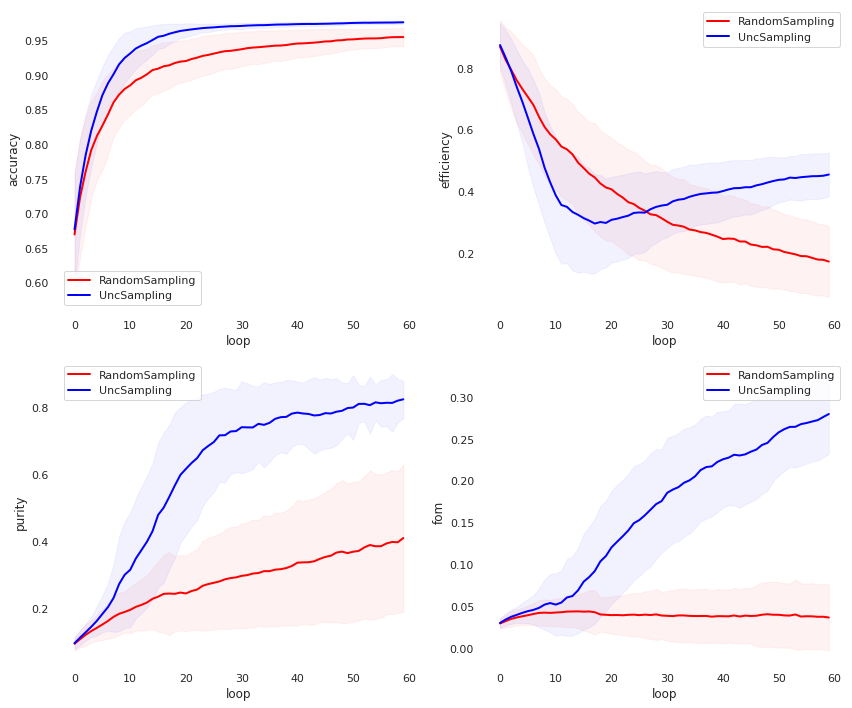

In [5]:
name = 'RandomSampling'
c = ['red', 'blue']

sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})

i = 0

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
for name in strategies_list:
    plt.plot(metrics[name][i]['loop'], acc_mean[name], label=name, color=c[strategies_list.index(name)], lw=2)
    plt.fill_between(metrics[name][i]['loop'], acc_mean[name] - acc_std[name], acc_mean[name] + acc_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.05)
plt.ylabel('accuracy')
plt.xlabel('loop')
plt.legend()

plt.subplot(2,2,2)
for name in strategies_list:
    plt.plot(metrics[name][i]['loop'], eff_mean[name], label=name, color=c[strategies_list.index(name)], lw=2)
    plt.fill_between(metrics[name][i]['loop'], eff_mean[name] - eff_std[name], eff_mean[name] + eff_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.05)
plt.ylabel('efficiency')
plt.xlabel('loop')
plt.legend()

plt.subplot(2,2,3)
for name in strategies_list:
    plt.plot(metrics[name][i]['loop'], pur_mean[name], label=name, color=c[strategies_list.index(name)], lw=2)
    plt.fill_between(metrics[name][i]['loop'], pur_mean[name] - pur_std[name], pur_mean[name] + pur_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.05)
plt.ylabel('purity')
plt.xlabel('loop')
plt.legend()

plt.subplot(2,2,4)
for name in strategies_list:
    plt.plot(metrics[name][i]['loop'], fom_mean[name], label=name, color=c[strategies_list.index(name)], lw=2)
    plt.fill_between(metrics[name][i]['loop'], fom_mean[name] - fom_std[name], fom_mean[name] + fom_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.05)
plt.ylabel('fom')
plt.xlabel('loop')
plt.legend()

plt.tight_layout()
#plt.show()
plt.savefig('plots/metrics_42876.png')